In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np


In [2]:
os.getcwd()

'/Users/regan/Documents/Springboard/Capstone2.0'

In [228]:
#show all columns
from IPython.display import display

pd.set_option('display.max_columns', None)

In [232]:
#load cleaned dataset 
pbp = pd.read_csv('pbp_active_cleaned.csv')
pbp.head()

,gameid,hometeam,awayteam,playid,activeteam,nonactive team,drive #,quarter,sec,homescore,awayscore,down,distance,yardstoendzone,zone,qb,pass yds,receiver,recyds,runner,runyds,kicker,kickyds,kickreturner,kickretyds,placekicker,pkyds,pkresult,penalty,int,fumble,td,xp result,two pt result,week,active_conf,home_conf,away_conf,home_rank,away_rank,pass,run,yards,scored,gain_loss,is_home,def_team_score,off_team_score,off_team_rank,def_team_rank,run_pass,rank_group
0,401110730,tennessee volunteers,georgia state panthers,104857801,tennessee volunteers,georgia state panthers,8,4,861,20,21,1,10,76,GREEN,Jarrett Guarantano,54.0,Dominick Wood-Anderson,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,54.0,0.0,gain,1.0,21.0,20.0,NaN,NaN,pass,unranked
1,401110730,tennessee volunteers,georgia state panthers,104994406,tennessee volunteers,georgia state panthers,12,4,55,23,38,3,4,36,ORANGE,Jarrett Guarantano,18.0,Dominick Wood-Anderson,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,18.0,0.0,gain,1.0,38.0,23.0,NaN,NaN,pass,unranked
2,401110730,tennessee volunteers,georgia state panthers,101884406,tennessee volunteers,georgia state panthers,2,1,715,0,7,3,4,62,GREEN,Jarrett Guarantano,7.0,Dominick Wood-Anderson,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,7.0,0.0,gain,1.0,7.0,0.0,NaN,NaN,pass,unranked
3,401110730,tennessee volunteers,georgia state panthers,101979201,tennessee volunteers,georgia state panthers,3,1,127,7,7,1,10,46,YELLOW,Jarrett Guarantano,0.0,Dominick Wood-Anderson,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,0.0,0.0,no yards,1.0,7.0,7.0,NaN,NaN,pass,unranked
4,401110732,vanderbilt commodores,georgia bulldogs,102876901,vanderbilt commodores,georgia bulldogs,2,2,750,0,14,3,31,62,GREEN,Riley Neal,5.0,Justice Shelton-Mosley,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,sec,NaN,3.0,1,0,5.0,0.0,gain,1.0,14.0,0.0,NaN,3.0,pass,unranked


In [233]:
pbp=pbp.rename(columns={'activeteam':'offense','active_conf':'off_conf'})

In [234]:
pbp.head()

,gameid,hometeam,awayteam,playid,offense,nonactive team,drive #,quarter,sec,homescore,awayscore,down,distance,yardstoendzone,zone,qb,pass yds,receiver,recyds,runner,runyds,kicker,kickyds,kickreturner,kickretyds,placekicker,pkyds,pkresult,penalty,int,fumble,td,xp result,two pt result,week,off_conf,home_conf,away_conf,home_rank,away_rank,pass,run,yards,scored,gain_loss,is_home,def_team_score,off_team_score,off_team_rank,def_team_rank,run_pass,rank_group
0,401110730,tennessee volunteers,georgia state panthers,104857801,tennessee volunteers,georgia state panthers,8,4,861,20,21,1,10,76,GREEN,Jarrett Guarantano,54.0,Dominick Wood-Anderson,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,54.0,0.0,gain,1.0,21.0,20.0,NaN,NaN,pass,unranked
1,401110730,tennessee volunteers,georgia state panthers,104994406,tennessee volunteers,georgia state panthers,12,4,55,23,38,3,4,36,ORANGE,Jarrett Guarantano,18.0,Dominick Wood-Anderson,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,18.0,0.0,gain,1.0,38.0,23.0,NaN,NaN,pass,unranked
2,401110730,tennessee volunteers,georgia state panthers,101884406,tennessee volunteers,georgia state panthers,2,1,715,0,7,3,4,62,GREEN,Jarrett Guarantano,7.0,Dominick Wood-Anderson,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,7.0,0.0,gain,1.0,7.0,0.0,NaN,NaN,pass,unranked
3,401110730,tennessee volunteers,georgia state panthers,101979201,tennessee volunteers,georgia state panthers,3,1,127,7,7,1,10,46,YELLOW,Jarrett Guarantano,0.0,Dominick Wood-Anderson,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,NaN,NaN,NaN,1,0,0.0,0.0,no yards,1.0,7.0,7.0,NaN,NaN,pass,unranked
4,401110732,vanderbilt commodores,georgia bulldogs,102876901,vanderbilt commodores,georgia bulldogs,2,2,750,0,14,3,31,62,GREEN,Riley Neal,5.0,Justice Shelton-Mosley,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,sec,sec,sec,NaN,3.0,1,0,5.0,0.0,gain,1.0,14.0,0.0,NaN,3.0,pass,unranked


In [304]:
#number of plays by down
pbp.groupby('down')['down'].count()

down
1    11423
2     7688
3     4731
4     2698
Name: down, dtype: int64

Text(0, 0.5, 'Count')

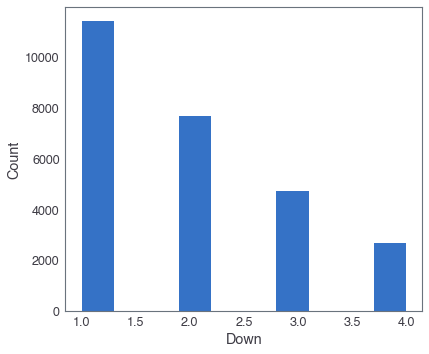

In [321]:
pbp['down'].hist(grid=False)
plt.xlabel('Down')
plt.ylabel('Count')

First down is the most frequent down, with second, third, and fourth continuing to decrease in count. This makes sense, as teams can gain ten yards and a new set of downs on any down in a drive, but usually only have one fourth down per drive as they will likely punt or kick a field goal on fourth down.

In [322]:
#number of plays by quarter
pbp.groupby('quarter')['quarter'].count()
# quarters 5 and 6 are overtime, so expect to see much less of them

quarter
1    6568
2    7120
3    6445
4    6341
5      46
6      20
Name: quarter, dtype: int64

In [323]:
#number of plays by rank group
pbp.groupby('rank_group')['rank_group'].count()

rank_group
11 to 15     2114
16 to 20     1738
21 to 25      534
6 to 10      2724
top 5        3078
unranked    16352
Name: rank_group, dtype: int64

Text(0, 0.5, 'Count')

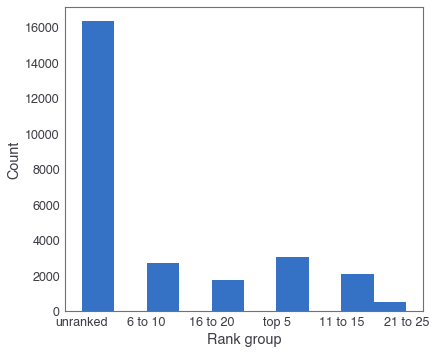

In [324]:
pbp['rank_group'].hist(grid=False)
plt.xlabel('Rank group')
plt.ylabel('Count')

Unranked teams attribute the highest number of plays by far. This makes sense, as only 25 teams are rankedo out of all 100+ division I college football teams.
There are noticeably fewere plays for teams ranked 21 to 25. This could be due to conference choice - the sec and the big ten may happen to not have as many teams ranked in this interval in 2019. 


#### Zones:
<pre>
yardsToEndzone <= 5	:	zone = "DARK-RED"
yardsToEndzone <= 10	:	zone = "ORANGE-RED"
yardsToEndzone <= 20	:	zone = "RED"
yardsToEndzone <= 40	:	zone = "ORANGE"
yardsToEndzone <= 60	:	zone = "YELLOW"
yardsToEndzone <= 80	:	zone = "GREEN"
otherwise		:	zone = "BLUE"
</pre

In [328]:
pbp.groupby('zone')['zone'].count()

zone
BLUE          2202
DARK-RED       910
GREEN         9683
ORANGE        4702
ORANGE-RED     816
RED           1863
YELLOW        6364
Name: zone, dtype: int64

Text(0, 0.5, 'Count')

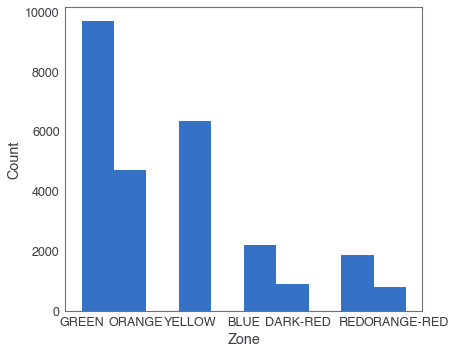

In [329]:
pbp['zone'].hist(grid=False)
plt.xlabel('Zone')
plt.ylabel('Count')

The dataset has fewer dark-red, orange-red, and red zone plays. This is likely due to scoring. The dataset also has fewer blue zone plays. Blue zone plays are plays where the team has more than 80 yards to go to the endzone. The default starting position is on teh 25 yard line, or 75 yards from the endzone, so starting with more than 75 yards to go is less common. 

# target variables: 
1) forward/backward/neutral : gain_loss <br>
2) score or not : scored <br>
3) yards gained : yards <br>

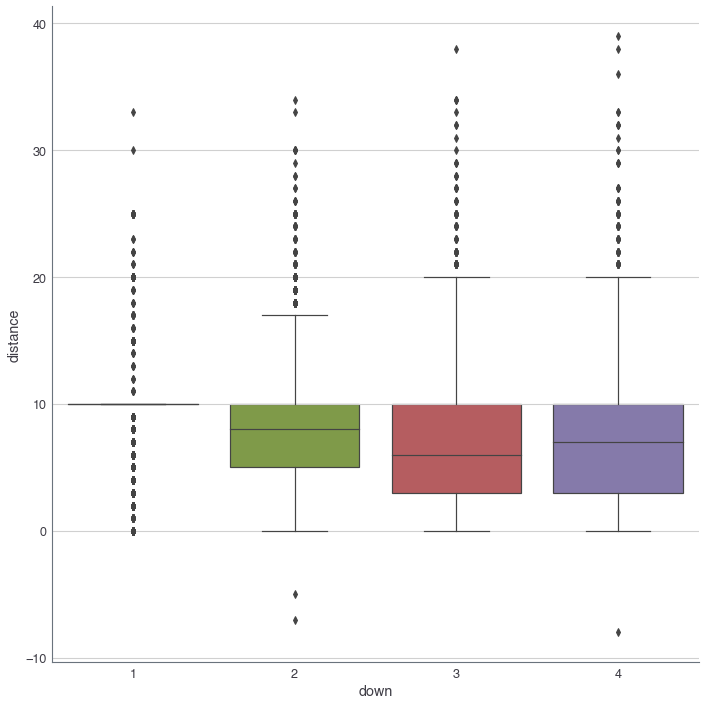

In [325]:
# distance to another set of first downs, by downs
sns.catplot(x='down', y='distance',
            kind="box", dodge=True, data=pbp, height=10);

These plots make sense because all sets of downs begin on first down with 10 yards to go. The only ways to have more or less than 10 yards to go on first down are penalties or starting within 10 yards of the endzone, both of which are relatively unusual.

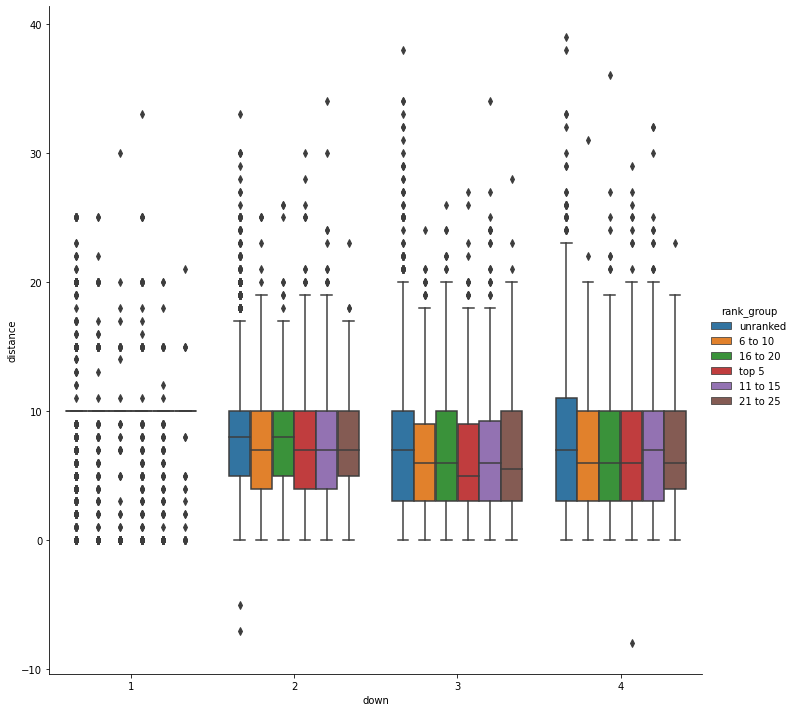

In [275]:
sns.catplot(x='down', y='distance', hue='rank_group',
            kind="box", dodge=True, data=pbp, height=10);

In [326]:
pbp.groupby(['rank_group','down']).distance.describe()

count      mean       std  min   25%   50%    75%   max
rank_group down                                                          
11 to 15   1      927.0  9.473571  2.312774  0.0  10.0  10.0  10.00  20.0
           2      630.0  7.330159  4.296508  0.0   4.0   7.0  10.00  34.0
           3      364.0  6.843407  5.234468  0.0   3.0   6.0   9.25  34.0
           4      193.0  7.419689  6.345522  0.0   3.0   7.0  10.00  32.0
16 to 20   1      717.0  9.493724  2.666579  0.0  10.0  10.0  10.00  30.0
           2      514.0  7.429961  3.846970  0.0   5.0   8.0  10.00  26.0
           3      317.0  6.798107  4.760425  0.0   3.0   6.0  10.00  26.0
           4      190.0  7.600000  5.995413  0.0   3.0   6.0  10.00  36.0
21 to 25   1      232.0  9.323276  2.715001  0.0  10.0  10.0  10.00  21.0
           2      161.0  7.173913  3.683689  0.0   5.0   7.0  10.00  23.0
           3       92.0  6.750000  5.344454  0.0   3.0   5.5  10.00  28.0
           4       49.0  7.346939  5.636751  0.0   4.0   6.0  10.00  23.0
6 to 10    1     1188.0  9.670875  2.611347  0.0  10.0  10.0  10.00  25.0
           2      819.0  7.058608  4.022733  0.0   4.0   7.0  10.00  25.0
           3      470.0  6.372340  4.592067  0.0   3.0   6.0   9.00  24.0
           4      247.0  6.643725  5.164233  0.0   3.0   6.0  10.00  31.0
top 5      1     1415.0  9.698940  2.541557  0.0  10.0  10.0  10.00  33.0
           2      895.0  7.369832  4.298768  0.0   4.0   7.0  10.00  30.0
           3      509.0  6.241650  4.626455  0.0   3.0   5.0   9.00  27.0
           4      259.0  7.274131  5.931631 -8.0   3.0   6.0  10.00  29.0
unranked   1     6944.0  9.075605  3.445870  0.0  10.0  10.0  10.00  25.0
           2     4669.0  7.956522  4.300270 -7.0   5.0   8.0  10.00  33.0
           3     2979.0  7.319235  5.135354  0.0   3.0   7.0  10.00  38.0
           4     1760.0  7.788068  5.737678  0.0   3.0   7.0  11.00  39.0

Top 15 teams have a wider range of yards to go (to achieve another first down) on their second down. They have a smaller range on third down.

# scored exploration

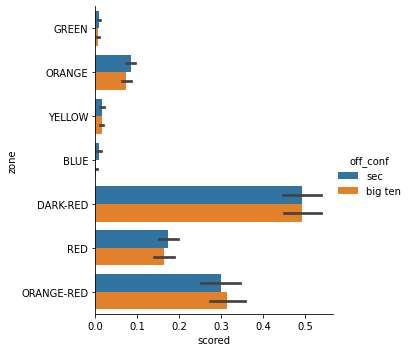

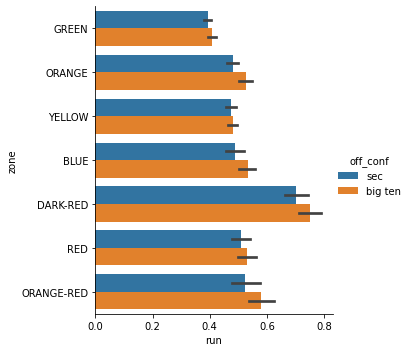

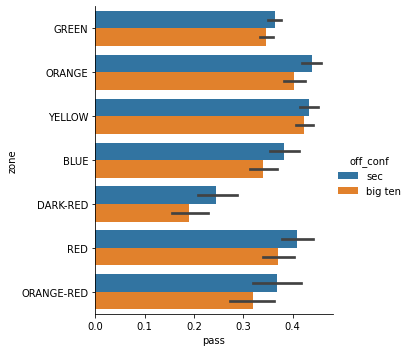

In [296]:
#which zone did teams score from?
sns.catplot(x='scored',y='zone',hue='off_conf',kind='bar', data=pbp_scored)
#what portion of plays in each zone were runs?
sns.catplot(x='run',y='zone',hue='off_conf',kind='bar', data=pbp_scored)
#what portion of plays in each zone were passes?
sns.catplot(x='pass',y='zone',hue='off_conf',kind='bar', data=pbp_scored);

In [346]:
pbp.groupby('rank_group')['scored'].sum()

rank_group
11 to 15    157.0
16 to 20     97.0
21 to 25     40.0
6 to 10     197.0
top 5       277.0
unranked    794.0
Name: scored, dtype: float64

In [331]:
pbp.groupby(['off_conf','run_pass'])['run_pass'].count()

off_conf  run_pass
big ten   other       1982
          pass        4946
          run         6441
sec       other       1937
          pass        5198
          run         6036
Name: run_pass, dtype: int64

In [341]:
rp = pbp.groupby('off_conf').agg({'run':'sum','pass':'sum'})
rppct = rp.apply(lambda x: x/x.sum())
rppct

,run,pass
off_conf,,
big ten,0.51623,0.487579
sec,0.48377,0.512421


The sec passes slightly more often than the big ten.

In [ ]:
l = ['penalty','int','fumble','quarter','down']
pbp_reduced[l].groupby(['quarter','down']).sum()

In [342]:
scored_perct = pbp_scored[l].groupby(['quarter','down']).agg({'penalty':'sum',
                                                     'int':'sum','fumble':'sum'})
#looking at percents of penalties, interceptions, and fumbles by quarter and down
scored_perct.apply(lambda x: x/x.sum())

penalty       int    fumble
quarter down                              
1       1     0.090239  0.061475  0.097561
        2     0.055249  0.073770  0.073171
        3     0.034991  0.081967  0.034146
        4     0.051565  0.004098  0.041463
2       1     0.103131  0.098361  0.100000
        2     0.079190  0.086066  0.073171
        3     0.047882  0.086066  0.043902
        4     0.066298  0.008197  0.029268
3       1     0.081031  0.086066  0.075610
        2     0.060773  0.049180  0.065854
        3     0.060773  0.106557  0.058537
        4     0.053407  0.004098  0.031707
4       1     0.073665  0.053279  0.107317
        2     0.055249  0.069672  0.087805
        3     0.047882  0.102459  0.046341
        4     0.038674  0.024590  0.034146
5       1     0.000000  0.000000  0.000000
        2     0.000000  0.004098  0.000000
        3     0.000000  0.000000  0.000000
        4     0.000000  0.000000  0.000000
6       1     0.000000  0.000000  0.000000
        2     0.000000  0.000000  0.000000
        3     0.000000  0.000000  0.000000
        4     0.000000  0.000000  0.000000

The percent of total fumbles and penalties seems to decrease with each down. Interceptions appear more varied.

Text(0, 0.5, 'Proportion')

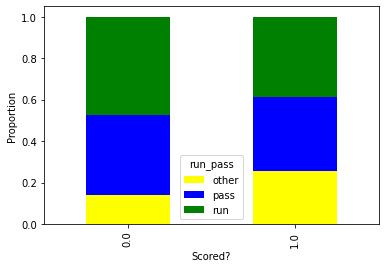

In [295]:
#run and pass scoring
rp_df = pbp.groupby(['scored','run_pass'])['down'].count().unstack()
percents_rp = rp_df.T.div(rp_df.T.sum()).T

fig, ax = plt.subplots()

percents_rp.plot(kind='bar', stacked=True, color=['yellow','blue','green'],ax=ax)
ax.set_xlabel('Scored?')
ax.set_ylabel('Proportion')

Run and pass plays both make up about 39% of scoring plays, and other (likely field goal kicks) plays make up about 22% 

Text(0, 0.5, 'Proportion')

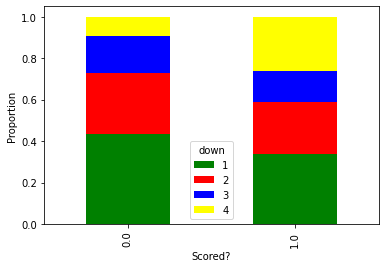

In [203]:
scored_downs_df = pbp.groupby(['scored','down'])['down'].count().unstack()
percents_scored = scored_downs_df.T.div(scored_downs_df.T.sum()).T

fig, ax = plt.subplots()

percents_scored.plot(kind='bar', stacked=True, color=['green','red','blue','yellow'],ax=ax)
ax.set_xlabel('Scored?')
ax.set_ylabel('Proportion')

Scores appear slightly more frequent on first down. Scores on third down are a noticeably smaller proportion, but third down plays are less frequent overall. The higher proportion of scores on fourth down are likely attributable to field goals.

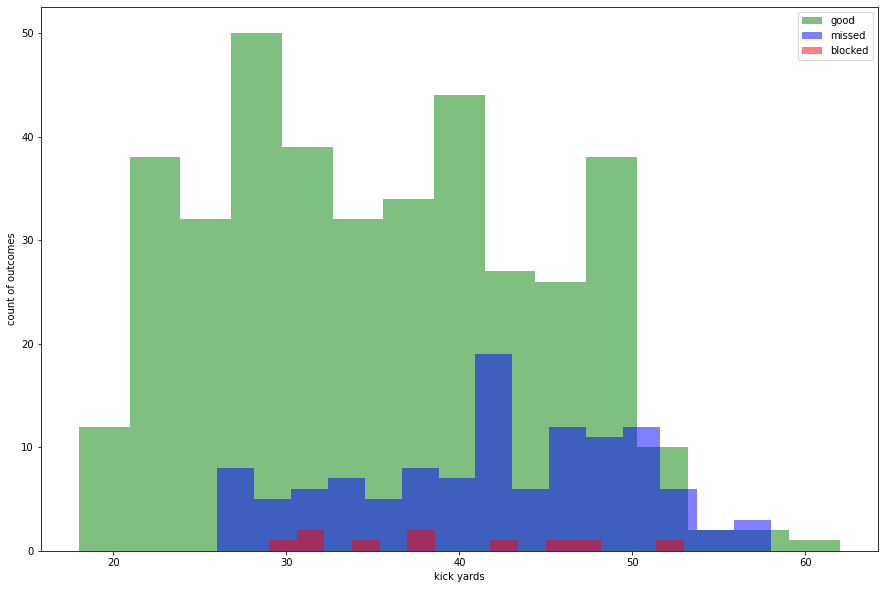

In [259]:
# field goals
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(pbp[pbp["pkresult"]=='GOOD']["pkyds"], bins=15, alpha=0.5, color="green", label="good")
ax.hist(pbp[pbp["pkresult"]=="MISSED"]["pkyds"], bins=15, alpha=0.5, color="blue", label="missed")
ax.hist(pbp[pbp["pkresult"]=="BLOCKED"]['pkyds'], bins=15, alpha=0.5, color="red", label="blocked")


plt.xlabel('kick yards')
plt.ylabel('count of outcomes')
plt.legend();

Shorter field goals were more likely to be good while longer ones are more likely to be missed. Blocked field goals appear to be spread from 29 to 52 yards. Blocked field goals are uncommon, so there is much less data on them.

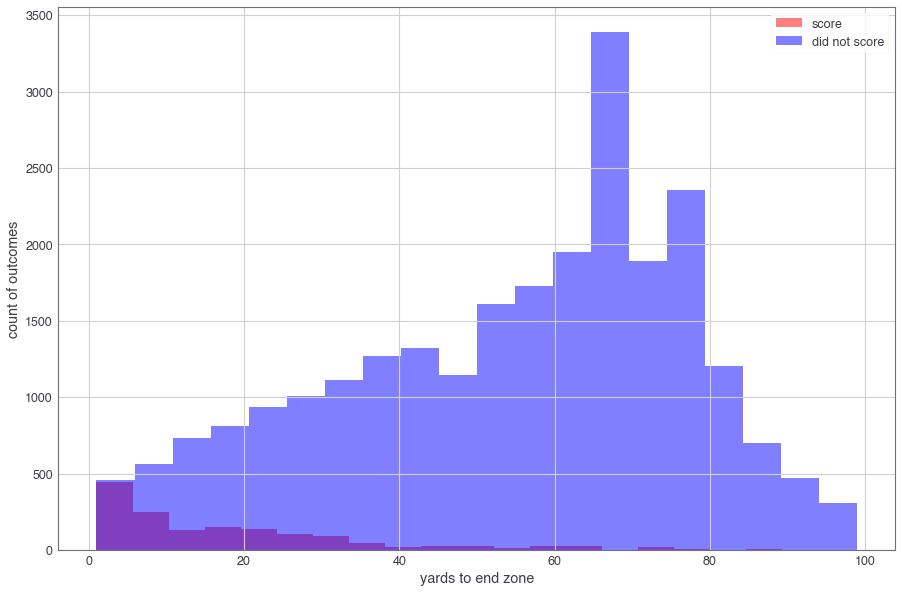

In [327]:
# yards to go and score
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(pbp[pbp["scored"]==1]["yardstoendzone"], bins=20, alpha=0.5, color="red", label="score")
ax.hist(pbp[pbp["scored"]==0]["yardstoendzone"], bins=20, alpha=0.5, color="blue", label="did not score")



plt.xlabel('yards to end zone')
plt.ylabel('count of outcomes')
plt.legend();

The number of scoring plays increases as yards to the endzone decreases, unsurprisingly. Scoring from 65-70 and 75-80 yards out are more uncommon. 

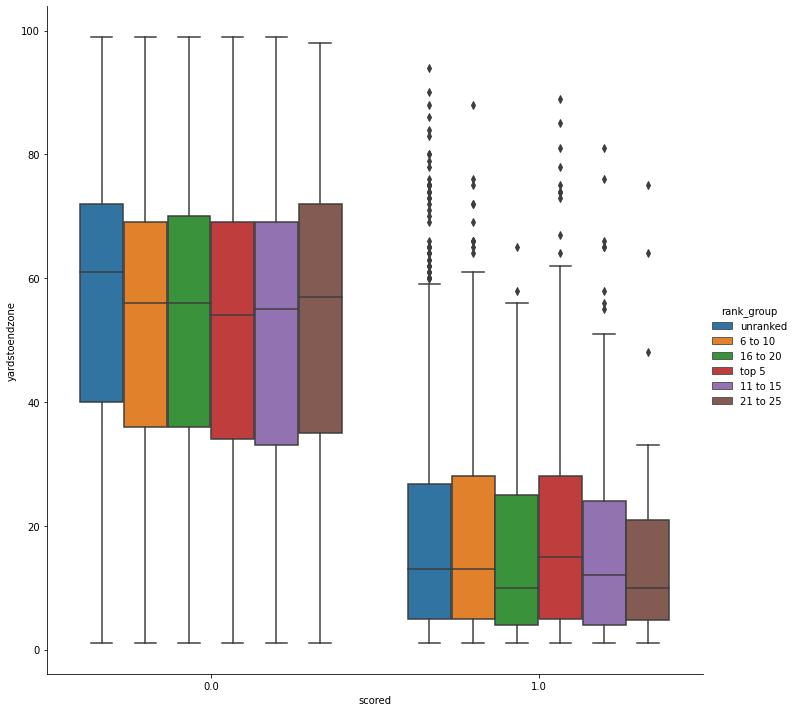

In [265]:
sns.catplot(x='scored', y='yardstoendzone', hue='rank_group',
            kind="box", dodge=True, data=pbp, height=10);

In [268]:
pbp.groupby(['rank_group','scored']).yardstoendzone.describe()

count       mean        std  min    25%   50%    75%  \
rank_group scored                                                           
11 to 15   0.0      1957.0  51.397036  23.675297  1.0  33.00  55.0  69.00   
           1.0       157.0  16.668790  16.574381  1.0   4.00  12.0  24.00   
16 to 20   0.0      1641.0  52.592931  22.470035  1.0  36.00  56.0  70.00   
           1.0        97.0  15.329897  14.691070  1.0   4.00  10.0  25.00   
21 to 25   0.0       494.0  52.242915  23.866381  1.0  35.00  57.0  72.00   
           1.0        40.0  15.000000  16.326791  1.0   4.75  10.0  21.00   
6 to 10    0.0      2527.0  52.263158  22.632718  1.0  36.00  56.0  69.00   
           1.0       197.0  19.101523  18.988446  1.0   5.00  13.0  28.00   
top 5      0.0      2801.0  51.500893  22.878236  1.0  34.00  54.0  69.00   
           1.0       277.0  19.985560  18.765906  1.0   5.00  15.0  28.00   
unranked   0.0     15558.0  55.382376  22.014415  1.0  40.00  61.0  72.00   
           1.0       794.0  18.948363  18.858833  1.0   5.00  13.0  26.75   

                    max  
rank_group scored        
11 to 15   0.0     99.0  
           1.0     81.0  
16 to 20   0.0     99.0  
           1.0     65.0  
21 to 25   0.0     98.0  
           1.0     75.0  
6 to 10    0.0     99.0  
           1.0     88.0  
top 5      0.0     99.0  
           1.0     89.0  
unranked   0.0     99.0  
           1.0     94.0

Top 5 teams score from slightly further down the field on agerage than other teams. The top 6 to 10 teams have a similar IQR as the top 5, but a lower average distance from the end zone for scoring. 

# Conclusions

There does not appear to be anything surprising or unusual in the data so far. The best teams score a from further out and score distributions across downs appear consistent with the rules of football. The big ten runs on a higher percentage of plays than the sec, but not by a large amount.

# gain_loss exploration

<AxesSubplot:xlabel='gain_loss', ylabel='count'>

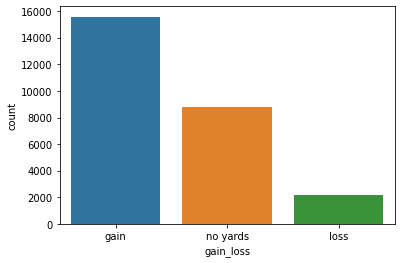

In [128]:
#count of each play result
sns.countplot(data = pbp, x = 'gain_loss')

In [158]:
#play outcomes as proportion of total play
gain_counts = pbp.groupby('gain_loss',)['down'].count()
div = gain_counts.sum()
gain_pect = gain_counts.divide(div, fill_value=0)

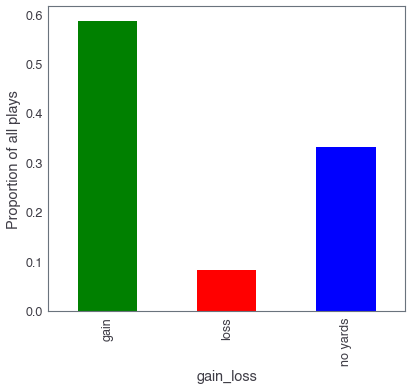

In [351]:
gain_pect.plot(kind="bar", stacked=True, color=["green", 'red',"blue"],grid=False);
plt.ylabel('Proportion of all plays');

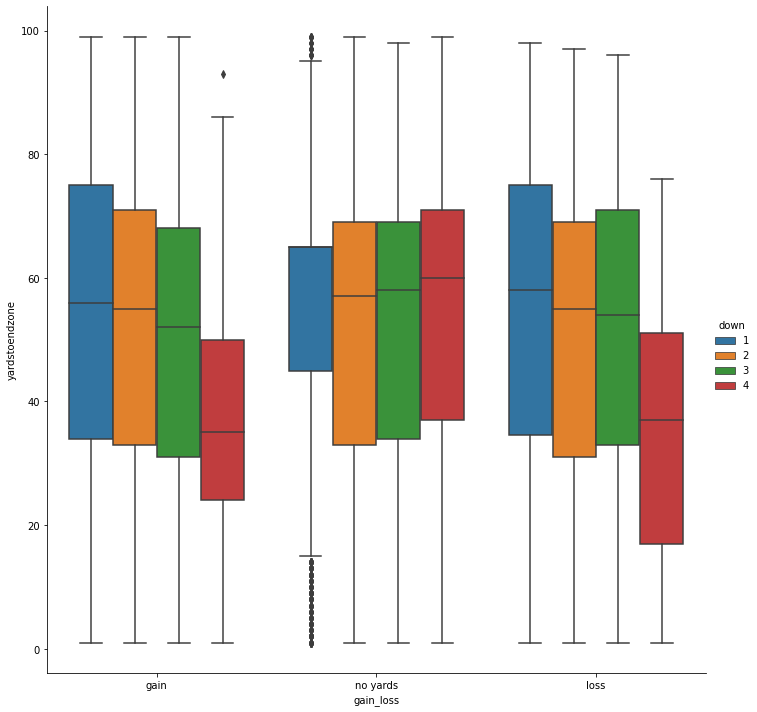

In [282]:
#gain loss by distance to endzone
sns.catplot(x="gain_loss", y="yardstoendzone", hue="down",
            kind="box", dodge=True, data=pbp, height=10);

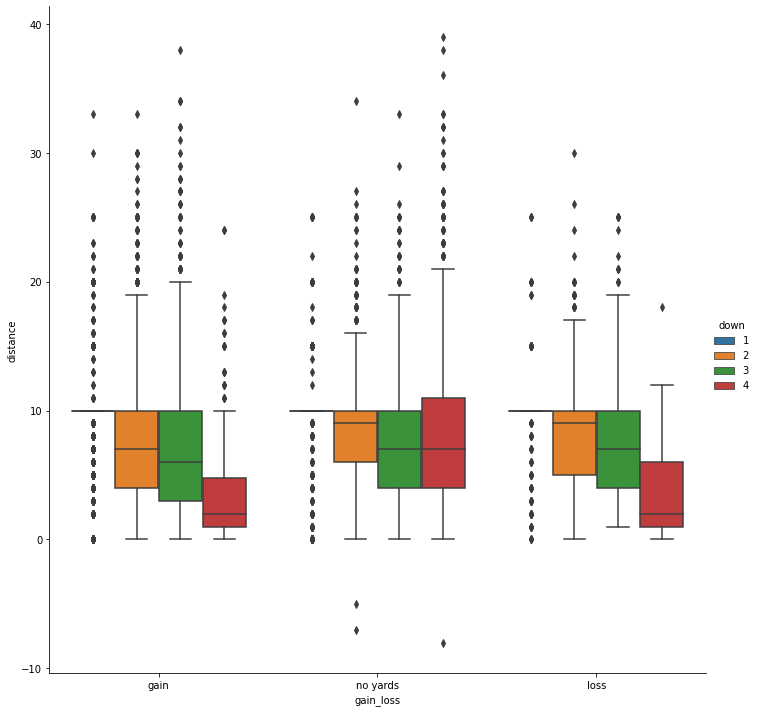

In [283]:
#gain loss by distance to first down
sns.catplot(x="gain_loss", y="distance", hue="down",
            kind="box", dodge=True, data=pbp, height=10);

Fourth down deviates from the other downs in both gain and loss plays. This is likely because when teams punt or attempt a field goal, there is usually no gain or loss. Teams typically "go for it" (attempt to gain another set of downs) on fourth down when they are closer to the endzone and in a desperate situation in a game (losing with little time left, for example).

In [190]:
#play type and play outcome
counts_df = pbp.groupby(['gain_loss','run_pass'])['down'].count().unstack()

In [193]:
percents_df = counts_df.T.div(counts_df.T.sum()).T

Text(0, 0.5, 'Proportion')

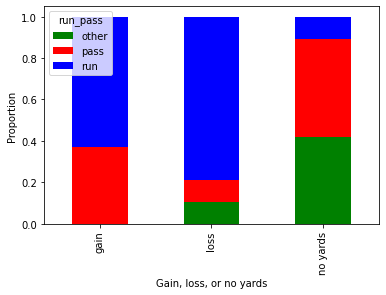

In [195]:
fig, ax = plt.subplots()
`
percents_df.plot(kind='bar', stacked=True, color=['green','red','blue'],ax=ax)
ax.set_xlabel('Gain, loss, or no yards')
ax.set_ylabel('Proportion')

<AxesSubplot:>

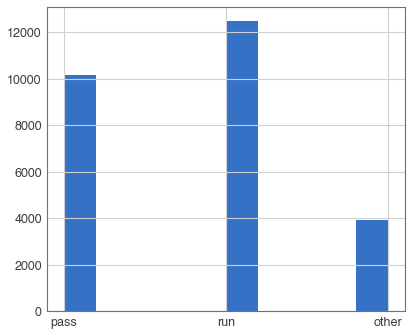

In [352]:
pbp['run_pass'].hist()

Run plays make up a large portion of the plays where yards are lost, while pass plays make up a large portion of plays that result in no yards gained or lost (likely due to incomplete passes). 

Text(0, 0.5, 'Proportion')

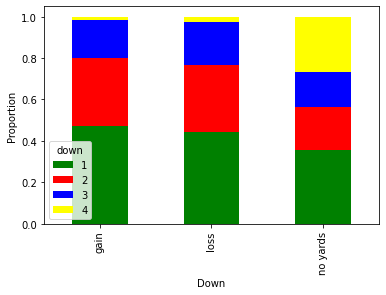

In [198]:
counts_downs_df = pbp.groupby(['gain_loss','down'])['down'].count().unstack()
percents_downs = counts_downs_df.T.div(counts_downs_df.T.sum()).T

fig, ax = plt.subplots()

percents_downs.plot(kind='bar', stacked=True, color=['green','red','blue','yellow'],ax=ax)
ax.set_xlabel('Down')
ax.set_ylabel('Proportion')

Fourth down makes up a larger portion of no yards gained or lost outcomes (likely due to punting and kicking field goals)

# Conclusions

About 60% of plays result in a gain, about 30% result in no gain or loss, and about 10% result in a loss. Fourth down stood out from the other downs in almost every chart in this section, which makes sense because teams approach fourth down very differently than the other downs. 

# yards exploration
## (yards gained in a play)

In [104]:
pbp['yards'].describe()

count    26540.000000
mean         5.053052
std          9.216259
min        -22.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         94.000000
Name: yards, dtype: float64

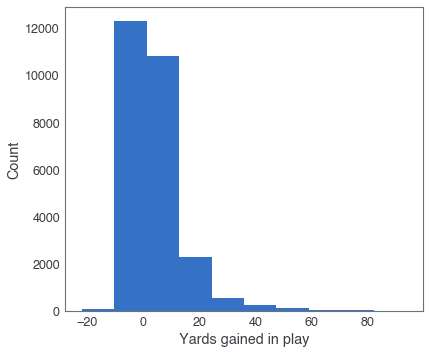

In [354]:
#evaluating yards gained 
pbp['yards'].hist(grid=False)
plt.xlabel('Yards gained in play')
plt.ylabel('Count');

Text(0, 0.5, 'Yards to endzone')

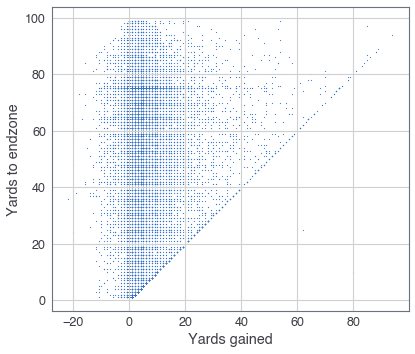

In [360]:
_ = plt.scatter(pbp['yards'],pbp['yardstoendzone'], s=1)
plt.xlabel('Yards gained')
plt.ylabel('Yards to endzone')

This plot shows few yards to endzone observations for plays with a large number of yards gained.

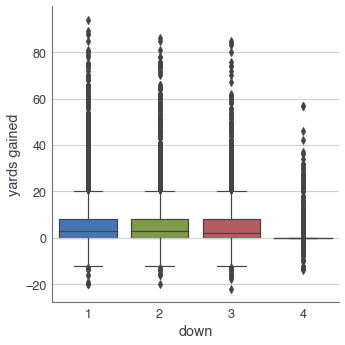

In [366]:
sns.catplot(x='down',y='yards',kind='box',data=pbp)
plt.ylabel('yards gained');

In [368]:
pbp.groupby('down')['yards'].describe()

,count,mean,std,min,25%,50%,75%,max
down,,,,,,,,
1,11423.0,5.638624,9.728067,-20.0,0.0,3.0,8.0,94.0
2,7688.0,5.491675,9.160093,-20.0,0.0,3.0,8.0,86.0
3,4731.0,5.360389,9.521518,-22.0,0.0,2.0,8.0,85.0
4,2698.0,0.785026,4.061052,-14.0,0.0,0.0,0.0,57.0


Yards gained seems to be very similar between first, second, and third down. Fourth down is again an anomaly, consistent with previous findings.

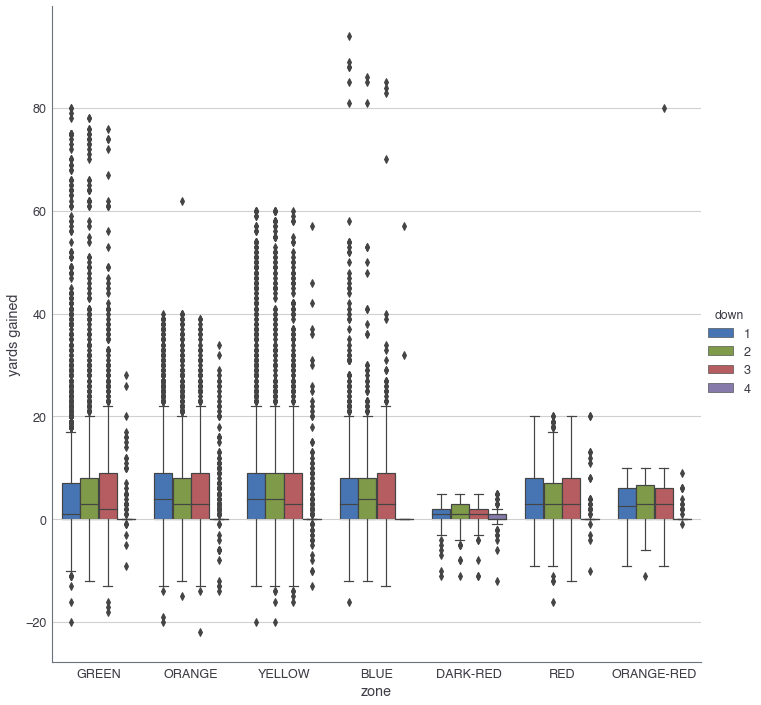

In [369]:
#yards gained per down by field zone
sns.catplot(x="zone", y="yards", hue="down",
            kind="box", dodge=True, data=pbp, height=10)
plt.ylabel('yards gained');

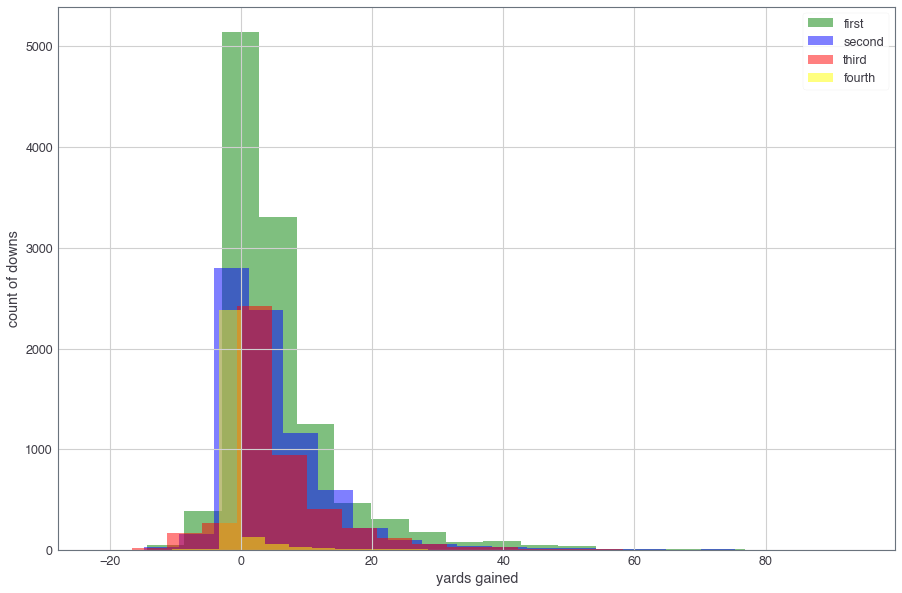

In [371]:
#yards gained per down count histogram
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(pbp[pbp["down"]==1]["yards"], bins=20, alpha=0.5, color="green", label="first")
ax.hist(pbp[pbp["down"]==2]["yards"], bins=20, alpha=0.5, color="blue", label="second")
ax.hist(pbp[pbp["down"]==3]["yards"], bins=20, alpha=0.5, color="red", label="third")
ax.hist(pbp[pbp["down"]==4]["yards"], bins=20, alpha=0.5, color="yellow", label="fourth")

plt.xlabel('yards gained')
plt.ylabel('count of downs')
plt.legend();

The yards gained per down seem to follow a similar distribution, although there is much less spread for fourth down. 

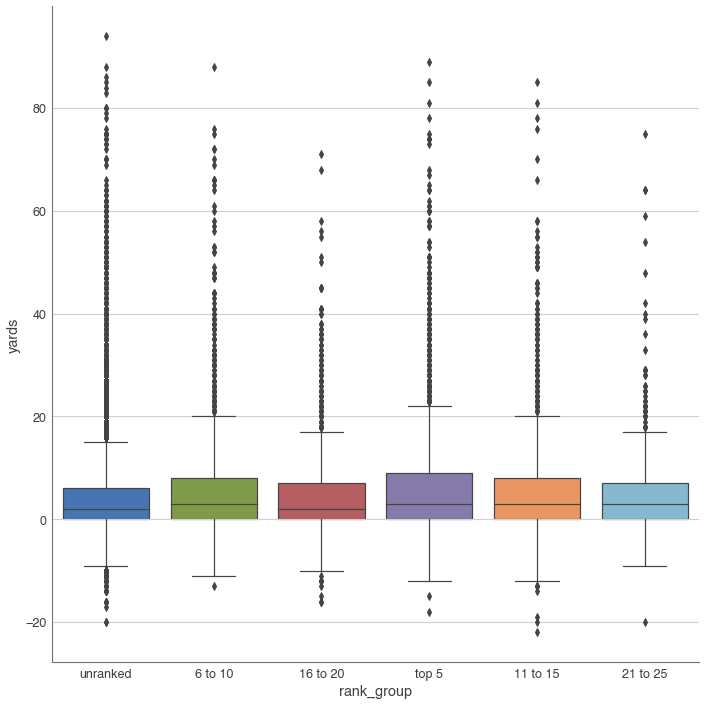

In [374]:
sns.catplot(x="rank_group", y="yards",
            kind="box", dodge=True, data=pbp, height=10);

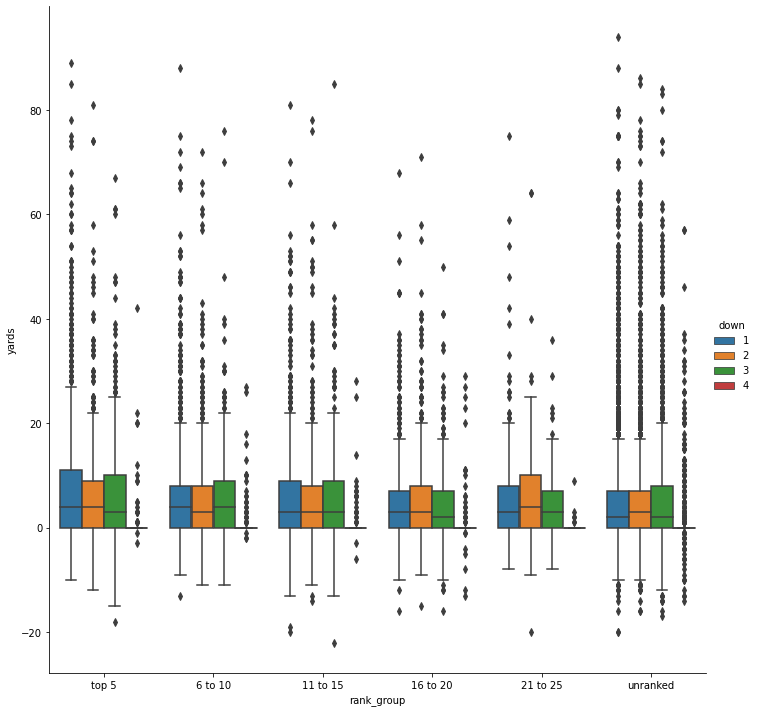

In [240]:
rank_order = ['top 5', '6 to 10','11 to 15', '16 to 20', '21 to 25','unranked']

sns.catplot(x="rank_group", y="yards", hue='down',
            kind="box", dodge=True, data=pbp, height=10, order = rank_order);

In [244]:
pbp.groupby(['rank_group','down']).yards.describe()

count      mean        std   min  25%  50%   75%   max
rank_group down                                                         
11 to 15   1      927.0  6.363538  10.218271 -20.0  0.0  3.0   9.0  81.0
           2      630.0  6.006349   9.811253 -14.0  0.0  3.0   8.0  78.0
           3      364.0  5.829670  10.493792 -22.0  0.0  3.0   9.0  85.0
           4      193.0  0.818653   3.299821  -6.0  0.0  0.0   0.0  28.0
16 to 20   1      717.0  5.200837   8.273695 -16.0  0.0  3.0   7.0  68.0
           2      514.0  5.712062   9.457547 -15.0  0.0  3.0   8.0  71.0
           3      317.0  4.220820   8.083532 -16.0  0.0  2.0   7.0  50.0
           4      190.0  0.910526   4.645917 -13.0  0.0  0.0   0.0  29.0
21 to 25   1      232.0  6.211207  10.350283  -8.0  0.0  3.0   8.0  75.0
           2      161.0  6.360248  10.324457 -20.0  0.0  4.0  10.0  64.0
           3       92.0  4.652174   7.165906  -8.0  0.0  3.0   7.0  36.0
           4       49.0  0.367347   1.394840   0.0  0.0  0.0   0.0   9.0
6 to 10    1     1188.0  6.495791  10.416798 -13.0  0.0  4.0   8.0  88.0
           2      819.0  5.683761   9.006320 -11.0  0.0  3.0   8.0  72.0
           3      470.0  5.831915   8.928491 -11.0  0.0  4.0   9.0  76.0
           4      247.0  0.850202   3.295388  -2.0  0.0  0.0   0.0  27.0
top 5      1     1415.0  7.831095  11.803394 -10.0  0.0  4.0  11.0  89.0
           2      895.0  6.458101   9.290621 -12.0  0.0  4.0   9.0  81.0
           3      509.0  6.502947  10.370427 -18.0  0.0  3.0  10.0  67.0
           4      259.0  0.675676   3.663542  -3.0  0.0  0.0   0.0  42.0
unranked   1     6944.0  4.974510   9.086463 -20.0  0.0  2.0   7.0  94.0
           2     4669.0  5.149068   8.978006 -16.0  0.0  3.0   7.0  86.0
           3     2979.0  5.176569   9.523488 -17.0  0.0  2.0   8.0  84.0
           4     1760.0  0.786364   4.269601 -14.0  0.0  0.0   0.0  57.0

The better teams gain slightly more yards per play, but there does not seem to be a big difference.

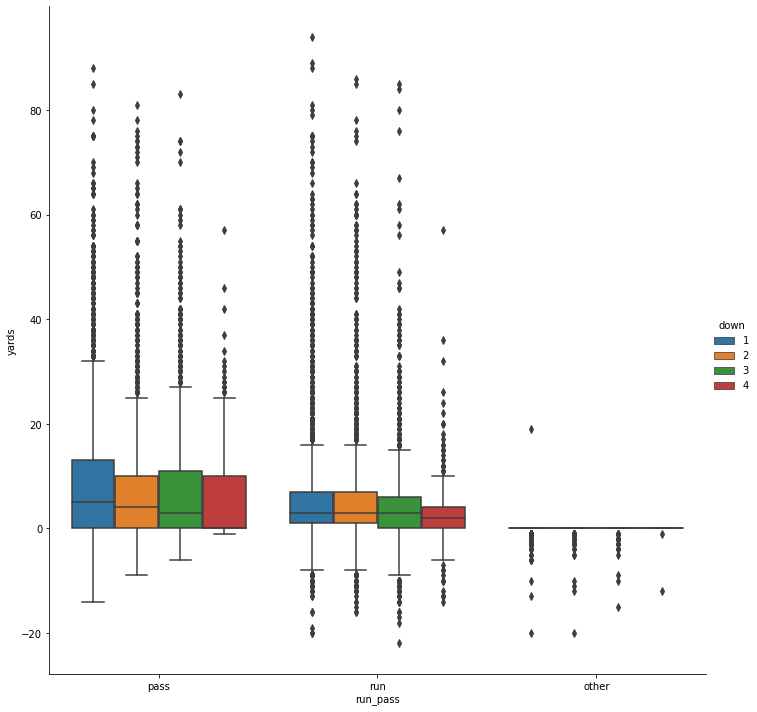

In [225]:
sns.catplot(x="run_pass", y="yards", hue='down',
            kind="box", dodge=True, data=pbp, height=10);

Pass plays have a larger spread of yards gained, but pass and run plays seem to have a similar average. Plays that are "other" are usually punt or kick plays, when you do not usually gain or lose yards.

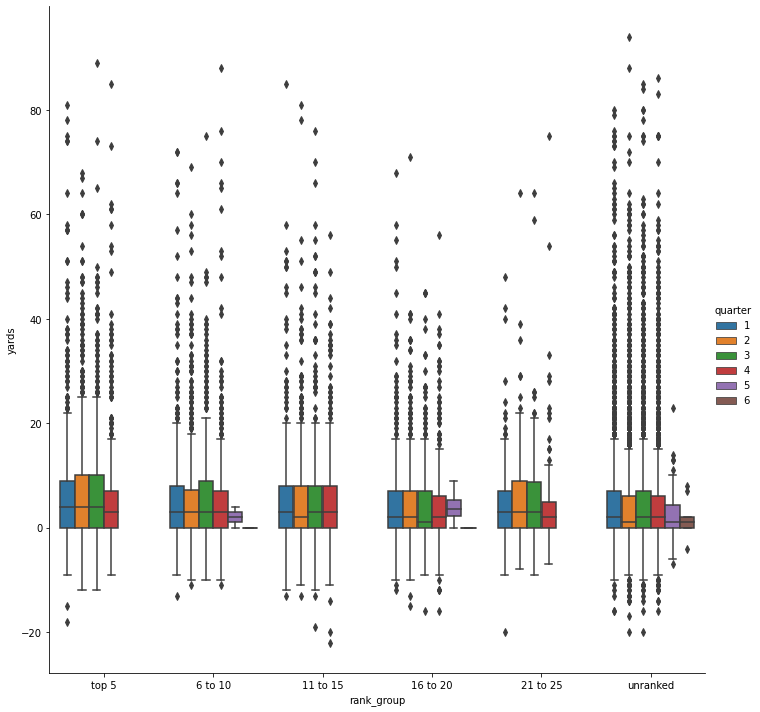

In [245]:
sns.catplot(x="rank_group", y="yards", hue='quarter',
            kind="box", dodge=True, data=pbp, height=10, order = rank_order);

Quarter does not seem to change the yards gained per play.

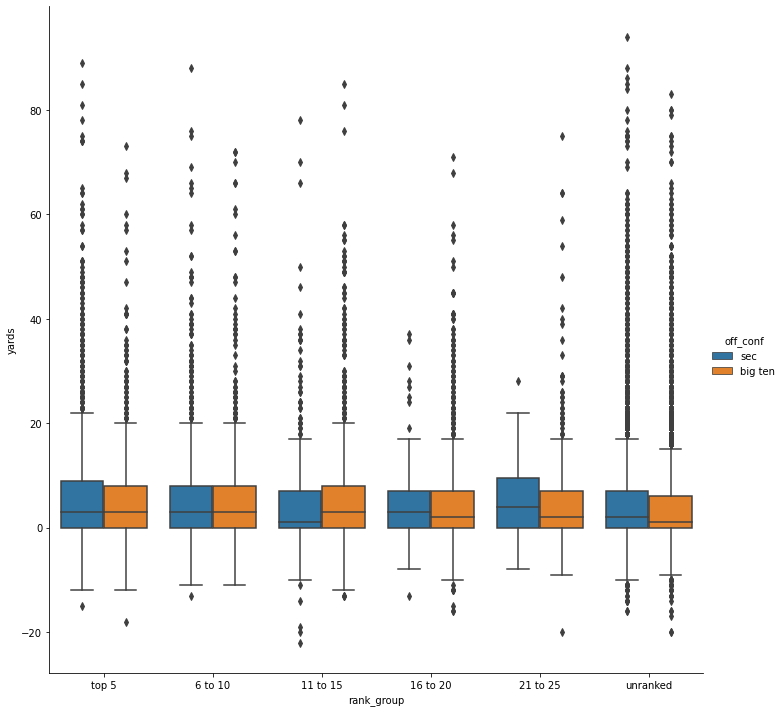

In [247]:
#yards gained by rank group by conference
sns.catplot(x="rank_group", y="yards", hue='off_conf',
            kind="box", dodge=True, data=pbp, height=10, order = rank_order);

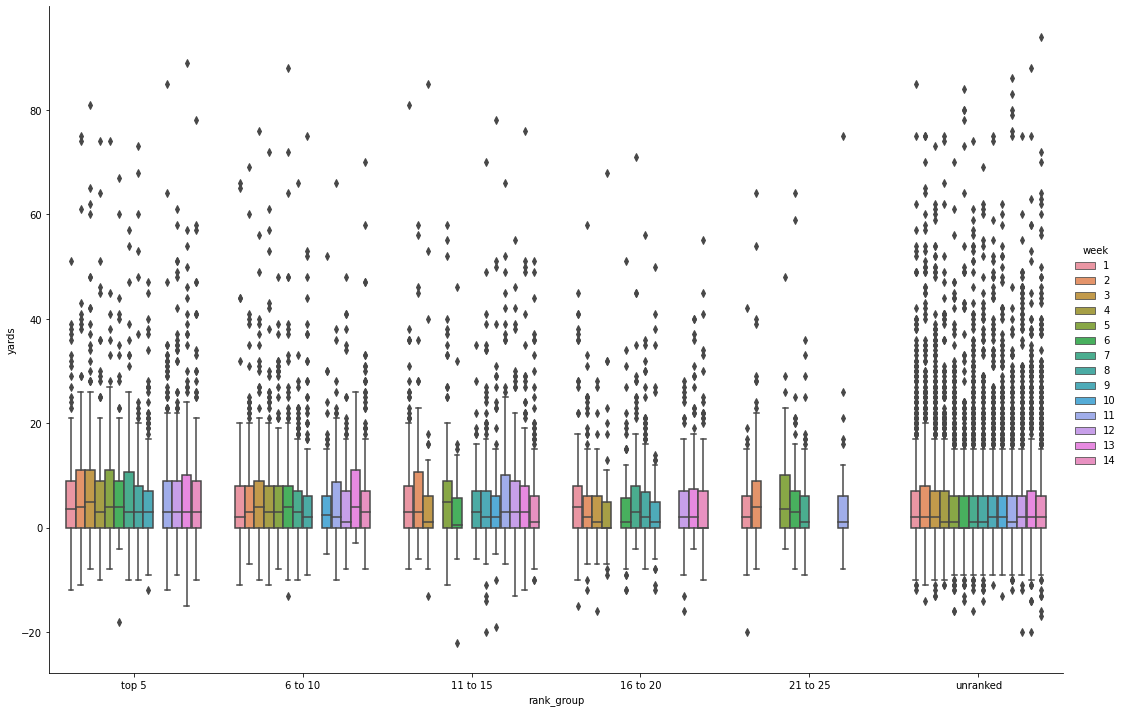

In [256]:
#rank group yards by week
sns.catplot(x="rank_group", y="yards", hue='week',
            kind="box", dodge=True, data=pbp, height=10, order = rank_order, aspect=1.5);

# Conclusions
Most plays result in gains of 0 to 20 grounds. The only thing that seems to have a noticeable impact on yards gained is whether the play is a run or pass play, but even then, the mean yards gained is similar. 